# Dealing With Categorical Variables 

Categorical variables are variables that represent data with distinct, finite categories or labels. These variables typically describe qualities or characteristics that do not have a meaningful numerical relationship, unlike continuous or ordinal variables. Categorical data can take on a limited number of values, each representing a different category or group.

There are two main types of categorical variables:

    Nominal variables: These represent categories without any intrinsic order or ranking. Examples include:
        Gender (Male, Female, Other)
        Color (Red, Blue, Green)
        Country (USA, Canada, UK)

    Ordinal variables: These represent categories with a meaningful order or ranking, but the intervals between the categories may not be equal. Examples include:
        Education level (High School, Bachelor's, Master's, PhD)
        Rating scale (Poor, Fair, Good, Excellent)
        Class levels (Freshman, Sophomore, Junior, Senior)

In [967]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


## Load the data set 

In [968]:
df =  pd.read_csv("./data/auto-mpg.csv")
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## Feature Engineering 

In [969]:
# create a new column called make
df["make"] = df["car name"].apply(lambda x: str.split(x)[0])
df



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,vw
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


## info

using info  to identify categorical variables 

In [970]:
# df["mpg"] = df["mpg"].astype(object)

In [971]:
# info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   make          392 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 30.8+ KB


## Numeric Variables

### Numeric variables can be either continuous or discrete.

Continuous variables correspond to "real numbers" in mathematics, and floating point numbers in code. Essentially these variables can have any value on the number line, and usually have a decimal place in their code representation.

In [972]:
# example of numeric variable
df["weight"]


0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
387    2790
388    2130
389    2295
390    2625
391    2720
Name: weight, Length: 392, dtype: int64

Discrete numeric variables typically correspond to "whole numbers" in mathematics, and integers in code. These variables have gaps between their values.

In [973]:
# example of decrete numeric variable
df["cylinders"].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

## Categorical Variables

### Categorical variables can actually be strings or numbers.

String categorical variables will be fairly obvious due to their data type (object in pandas). For example, make is a categorical variable. It cannot be used in a scatter plot, and it will cause an error if you try to use it in a multiple regression model without additional transformations.

In [974]:
# example of a categorical variable 
df["make"]


0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
387         ford
388           vw
389        dodge
390         ford
391        chevy
Name: make, Length: 392, dtype: object

In [975]:
# value counts
df["make"].value_counts()


make
ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
saab              4
subaru            4
opel              4
chevy             3
renault           3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64

In [976]:
df["make"]= df["make"].replace({
    "chevroelt": "chevrolet",
    "mercedes": "mercedes-benz",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "maxda": "mazda",
    "chevy": "chevrolet",
    "vw": "volkswagen"})

df['make'].value_counts()

make
ford             48
chevrolet        47
plymouth         31
dodge            28
amc              27
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
saab              4
subaru            4
opel              4
mercedes-benz     3
renault           3
bmw               2
cadillac          2
hi                1
capri             1
triumph           1
nissan            1
Name: count, dtype: int64

In [977]:
mispelled = {"vw":"volkswagen","chevy":"chevrolet"}

for mispelled,correct in mispelled.items():
    df["make"] = df["make"].replace(mispelled,correct)
    
df["make"].value_counts()

make
ford             48
chevrolet        47
plymouth         31
dodge            28
amc              27
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
saab              4
subaru            4
opel              4
mercedes-benz     3
renault           3
bmw               2
cadillac          2
hi                1
capri             1
triumph           1
nissan            1
Name: count, dtype: int64

In [978]:
df["make"] = df["make"].replace(["vw","vokswagen"],"volkswagen")

df["make"].value_counts()

make
ford             48
chevrolet        47
plymouth         31
dodge            28
amc              27
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
saab              4
subaru            4
opel              4
mercedes-benz     3
renault           3
bmw               2
cadillac          2
hi                1
capri             1
triumph           1
nissan            1
Name: count, dtype: int64

In [979]:
# create an other category for values with count < 5


### plotting 

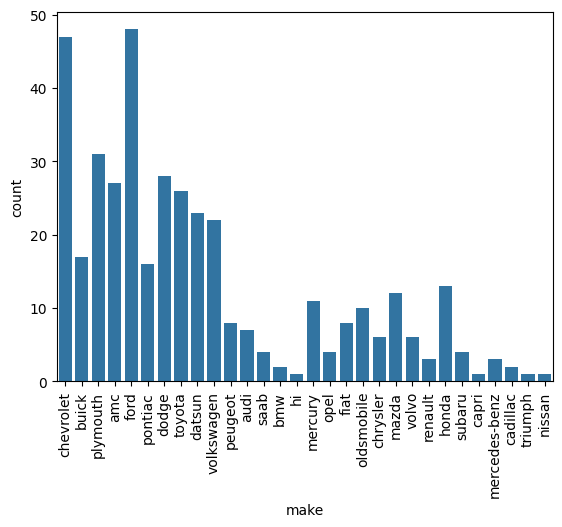

In [980]:
# plotting in built 
sns.countplot(data=df,x="make")
plt.xticks(rotation=90)
plt.show()


### seaborn

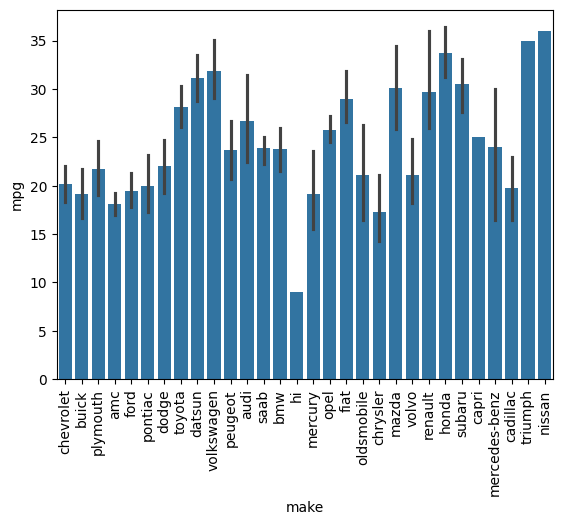

In [981]:
# plotting sns 
sns.barplot(data=df,x="make",y="mpg")
plt.xticks(rotation=90)
plt.show()


Discrete number categorical variables can be more difficult to spot. For example, origin is actually a categorical variable in this dataset, even though it is encoded as a number.

In [982]:
# decrete categorical variables counter 
df["origin"].value_counts()


origin
1    245
3     79
2     68
Name: count, dtype: int64

<Axes: xlabel='origin', ylabel='count'>

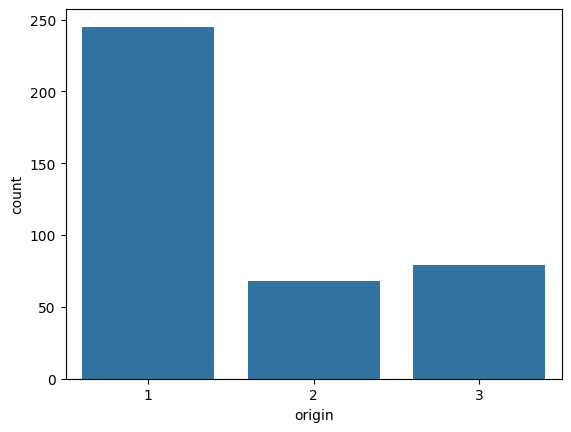

In [983]:
sns.countplot(data=df,x="origin")

In [984]:
# US to Europe, or Europe to Asia

## Transforming Categorical Variables with One-Hot Encoding

One-hot encoding is a technique used to convert categorical variables into a numerical format that can be used in machine learning models. It is particularly useful for handling nominal categorical variables, which do not have an inherent order or ranking.

In [985]:
# make a copy
df_copy =  df.copy()
df_copy


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


In [986]:
# manual encoding
df_copy["make_for_manual"] = df_copy["make"].apply(lambda x: 1 if x == "ford" else 0)
df_copy.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make,make_for_manual
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,1


## using Get dummies


In [987]:
# using get dummies 
df_copy = pd.get_dummies(df_copy,columns=["make"],dtype=int,drop_first=True)
df_copy.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make_for_manual,make_audi,make_bmw,make_buick,make_cadillac,make_capri,make_chevrolet,make_chrysler,make_datsun,make_dodge,make_fiat,make_ford,make_hi,make_honda,make_mazda,make_mercedes-benz,make_mercury,make_nissan,make_oldsmobile,make_opel,make_peugeot,make_plymouth,make_pontiac,make_renault,make_saab,make_subaru,make_toyota,make_triumph,make_volkswagen,make_volvo
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [988]:
# research use category encoders 

## The Dummy Variable Trap

Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. For example, if you know that origin_1 is 0 and origin_2 is 0, then you already know that origin_3 must be 1.

In [989]:
# making predictions
df_copy =  pd.get_dummies(df_copy,columns=["origin"],dtype=int,drop_first=True)
df_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,make_for_manual,make_audi,make_bmw,make_buick,make_cadillac,make_capri,make_chevrolet,make_chrysler,make_datsun,make_dodge,make_fiat,make_ford,make_hi,make_honda,make_mazda,make_mercedes-benz,make_mercury,make_nissan,make_oldsmobile,make_opel,make_peugeot,make_plymouth,make_pontiac,make_renault,make_saab,make_subaru,make_toyota,make_triumph,make_volkswagen,make_volvo,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [990]:
df_copy["prediction"] = 1 - df_copy["origin_2"]-df_copy["origin_3"]
df_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,make_for_manual,make_audi,make_bmw,make_buick,make_cadillac,make_capri,make_chevrolet,make_chrysler,make_datsun,make_dodge,make_fiat,make_ford,make_hi,make_honda,make_mazda,make_mercedes-benz,make_mercury,make_nissan,make_oldsmobile,make_opel,make_peugeot,make_plymouth,make_pontiac,make_renault,make_saab,make_subaru,make_toyota,make_triumph,make_volkswagen,make_volvo,origin_2,origin_3,prediction
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


This is known as perfect multicollinearity and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can perfectly predict what one variable will be using some combination of the other variables.

When features in a linear regression have perfect multicollinearity due to the algorithm for creating dummy variables, this is known as the dummy variable trap.

### Avoiding the dummy variable trap 

In [991]:
# avoiding the dummy variable trap


## Multiple Regression with One-Hot Encoded Variables

In [992]:
# defining our x and y
y = df["mpg"]
X = df[["weight", "model year", "origin"]]
X

,weight,model year,origin
0,3504,70,1
1,3693,70,1
2,3436,70,1
3,3433,70,1
4,3449,70,1
...,...,...,...
387,2790,82,1
388,2130,82,2
389,2295,82,1
390,2625,82,1


### One hot encoding  

In [ ]:
# one hot encoding 
X_encoded = pd.get_dummies(X,columns=["origin"],drop_first=True,dtype=int)

X_encoded.head()



,weight,model year,origin_2,origin_3
0,3504,70,0,0
1,3693,70,0,0
2,3436,70,0,0
3,3433,70,0,0
4,3449,70,0,0


## Modeling 

in stats models 

In [994]:
# ols model
ols_model = sm.OLS(y,sm.add_constant(X_encoded))
ols_results =  ols_model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     437.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.53e-142
Time:                        20:34:01   Log-Likelihood:                -1026.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     387   BIC:                             2082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3069      4.017     -4.557      0.000     -26.205     -10.409
weight        -0.0059      0.000    -22.647      0.000      -0.006      -0.005
model year     0.7698      0.049     15.818      0.000       0.674       0.866
origin_2       1.9763      0.518      3.815      0.000       0.958       2.995
origin_3       2.2145      0.519      4.268      0.000       1.194       3.235
==============================================================================
Omnibus:                       32.293   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.234
Skew:                           0.507   Prob(JB):                     2.26e-13
Kurtosis:                       4.593   Cond. No.                     7.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ploting 

In [995]:
# plotting in smgrephics  reg_ress_plot


## Scikit Learn 

In [1007]:
# in Sckit learn 

sk_model =  LinearRegression()
sk_results = sk_model.fit(X=X_encoded,y=y)

print_results(sk_results,ols_results)





StatsModels intercept:    -18.306943893885254
scikit-learn intercept:   -18.30694389388543

StatsModels coefficient:
const        -18.306944
weight        -0.005887
model year     0.769849
origin_2       1.976306
origin_3       2.214534
dtype: float64
scikit-learn coefficient: [-0.005887    0.76984869  1.97630597  2.21453408]



### Compare results

In [997]:
def print_results(sk_model,ols_model):
    print(f"""


StatsModels intercept:    {ols_model.params["const"]}
scikit-learn intercept:   {sk_model.intercept_}

StatsModels coefficient:\n{ols_model.params}
scikit-learn coefficient: {sk_model.coef_}
""")

### Assignment

In [998]:
# build a model with make as a variable with make as a varible guide

# https://moringa.instructure.com/courses/895/assignments/63678?module_item_id=144477

In [999]:
from sklearn.preprocessing import OneHotEncoder

In [1000]:
ohe =  OneHotEncoder(sparse_output=False)
encoded =  ohe.fit_transform(X=X[["origin"]])
ohe.get_feature_names_out()

array(['origin_1', 'origin_2', 'origin_3'], dtype=object)

In [1001]:
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out())

In [1002]:
df_final = pd.concat([X,encoded_df],axis=1)
df_final


,weight,model year,origin,origin_1,origin_2,origin_3
0,3504,70,1,1.0,0.0,0.0
1,3693,70,1,1.0,0.0,0.0
2,3436,70,1,1.0,0.0,0.0
3,3433,70,1,1.0,0.0,0.0
4,3449,70,1,1.0,0.0,0.0
...,...,...,...,...,...,...
387,2790,82,1,1.0,0.0,0.0
388,2130,82,2,0.0,1.0,0.0
389,2295,82,1,1.0,0.0,0.0
390,2625,82,1,1.0,0.0,0.0


In [1003]:
! pip install category_encoders


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import category_encoders as encoders

ohe =  encoders.OneHotEncoder(cols=["origin"],drop_invariant=True,)



transformed_df = ohe.fit_transform(X)
transformed_df

,weight,model year,origin
0,3504,70,1
1,3693,70,1
2,3436,70,1
3,3433,70,1
4,3449,70,1
...,...,...,...
387,2790,82,1
388,2130,82,3
389,2295,82,1
390,2625,82,1
